<a href="https://colab.research.google.com/github/naranjitoct/UPCT_IA_2022/blob/main/01_01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LINEAR REGRESION


https://www.kaggle.com/code/bayunova/steel-industry-energy-consumption

In [1]:
# TODO: REVISAR LAS LIBRERIAS 

#import library
import matplotlib as mpl
import seaborn as sns
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso, ElasticNet
from sklearn import metrics #Seen in other tutorial (instead of using only mean_squared_error, r2_score )
#from sklearn.metrics import mean_squared_error, r2_score
from bokeh.plotting import figure
from bokeh.io import output_file,show
from sklearn.preprocessing import StandardScaler  

In [2]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.6 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/LR/Steel_industry_data.csv')


In [5]:
df.shape

(35040, 11)

Let's study Electricity again... ( https://www.tutorialspoint.com/difference-between-leading-and-lagging-power-factor )

Leading- Inductives
Lagging - Capacitives


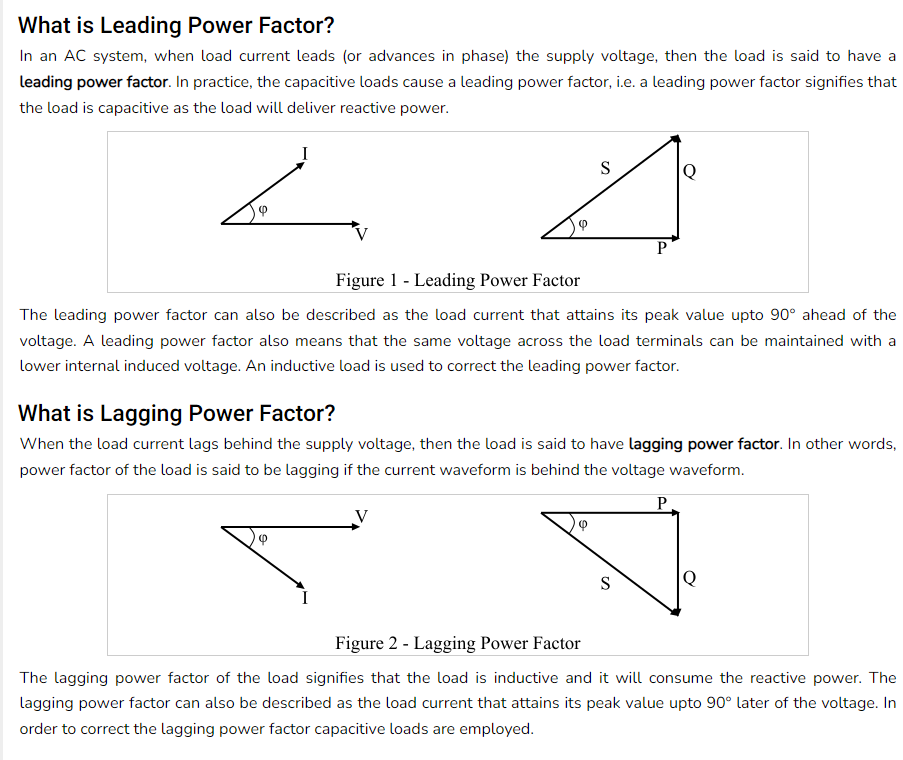

To comment about the coluns
NSM = Number of Seconds from midnight

In [6]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [7]:
print('-----Not a number----\n')
print(df.isna().sum())
print('\n-----null ----\n')
print(df.isnull().sum())

-----Not a number----

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

-----null ----

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [8]:
df.info() # to highlight Lagging_Current_Reactive.Power_kVarh uses '.' instead of '_' --- Rest of data seems normal data. Not too much DW is foreseen.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [9]:
print('-----Column WeekStatus ----\n') ## Weekday & Weekend     
print(df['WeekStatus'].value_counts())

print('\n-----Column Day_of_week ----\n')  # 7 days of the week
print(df['Day_of_week'].value_counts())

print('\n-----Column Load_Type ----\n') # 3 different troughput
print(df['Load_Type'].value_counts())

-----Column WeekStatus ----

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

-----Column Day_of_week ----

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

-----Column Load_Type ----

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64


In [10]:
df.describe() #our y will be Usage_kwh

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

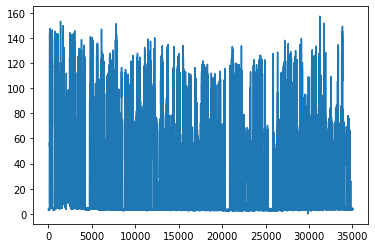

In [11]:
plt.plot(df['Usage_kWh'])

In [12]:
df=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/LR/Steel_industry_data.csv')
df.head(1)
df[df['NSM']==1800]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
1      01/01/2018 00:30       4.00                                  4.46   
97     02/01/2018 00:30       3.85                                  4.61   
193    03/01/2018 00:30       4.61                                  4.54   
289    04/01/2018 00:30       4.64                                  4.57   
385    05/01/2018 00:30       4.68                                  5.22   
...                 ...        ...                                   ...   
34561  27/12/2018 00:30       3.74                                  2.99   
34657  28/12/2018 00:30       3.78                                  2.34   
34753  29/12/2018 00:30       4.82                                  2.77   
34849  30/12/2018 00:30       3.82                                  3.20   
34945  31/12/2018 00:30       3.31                                  2.20   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
1                                      0.00        0.0   
97                                     0.00        0.0   
193                                    0.00        0.0   
289                                    0.00        0.0   
385                                    0.00        0.0   
...                                     ...        ...   
34561                                  0.22        0.0   
34657                                  0.50        0.0   
34753                                  0.00        0.0   
34849                                  0.04        0.0   
34945                                  0.11        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
1                             66.77                        100.00  1800   
97                            64.10                        100.00  1800   
193                           71.25                        100.00  1800   
289                           71.25                        100.00  1800   
385                           66.75                        100.00  1800   
...                             ...                           ...   ...   
34561                         78.11                         99.83  1800   
34657                         85.03                         99.14  1800   
34753                         86.70                        100.00  1800   
34849                         76.66                         99.99  1800   
34945                         83.28                         99.94  1800   

      WeekStatus Day_of_week   Load_Type  
1        Weekday      Monday  Light_Load  
97       Weekday     Tuesday  Light_Load  
193      Weekday   Wednesday  Light_Load  
289      Weekday    Thursday  Light_Load  
385      Weekday      Friday  Light_Load  
...          ...         ...         ...  
34561    Weekday    Thursday  Light_Load  
34657    Weekday      Friday  Light_Load  
34753    Weekend    Saturday  Light_Load  
34849    Weekend      Sunday  Light_Load  
34945    Weekday      Monday  Light_Load  

[365 rows x 11 columns]

In [13]:
#df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')
#df['date'] = pd.to_datetime(df['date']) ... WARNING:... data format...
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M")
df.head()
df[df['NSM']==1800]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
1     2018-01-01 00:30:00       4.00                                  4.46   
97    2018-01-02 00:30:00       3.85                                  4.61   
193   2018-01-03 00:30:00       4.61                                  4.54   
289   2018-01-04 00:30:00       4.64                                  4.57   
385   2018-01-05 00:30:00       4.68                                  5.22   
...                   ...        ...                                   ...   
34561 2018-12-27 00:30:00       3.74                                  2.99   
34657 2018-12-28 00:30:00       3.78                                  2.34   
34753 2018-12-29 00:30:00       4.82                                  2.77   
34849 2018-12-30 00:30:00       3.82                                  3.20   
34945 2018-12-31 00:30:00       3.31                                  2.20   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
1                                      0.00        0.0   
97                                     0.00        0.0   
193                                    0.00        0.0   
289                                    0.00        0.0   
385                                    0.00        0.0   
...                                     ...        ...   
34561                                  0.22        0.0   
34657                                  0.50        0.0   
34753                                  0.00        0.0   
34849                                  0.04        0.0   
34945                                  0.11        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
1                             66.77                        100.00  1800   
97                            64.10                        100.00  1800   
193                           71.25                        100.00  1800   
289                           71.25                        100.00  1800   
385                           66.75                        100.00  1800   
...                             ...                           ...   ...   
34561                         78.11                         99.83  1800   
34657                         85.03                         99.14  1800   
34753                         86.70                        100.00  1800   
34849                         76.66                         99.99  1800   
34945                         83.28                         99.94  1800   

      WeekStatus Day_of_week   Load_Type  
1        Weekday      Monday  Light_Load  
97       Weekday     Tuesday  Light_Load  
193      Weekday   Wednesday  Light_Load  
289      Weekday    Thursday  Light_Load  
385      Weekday      Friday  Light_Load  
...          ...         ...         ...  
34561    Weekday    Thursday  Light_Load  
34657    Weekday      Friday  Light_Load  
34753    Weekend    Saturday  Light_Load  
34849    Weekend      Sunday  Light_Load  
34945    Weekday      Monday  Light_Load  

[365 rows x 11 columns]

In [14]:
df['Weekday'] = pd.factorize(df['date'].dt.day_of_week)[0] + 1
df[df['NSM']==1800]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
1     2018-01-01 00:30:00       4.00                                  4.46   
97    2018-01-02 00:30:00       3.85                                  4.61   
193   2018-01-03 00:30:00       4.61                                  4.54   
289   2018-01-04 00:30:00       4.64                                  4.57   
385   2018-01-05 00:30:00       4.68                                  5.22   
...                   ...        ...                                   ...   
34561 2018-12-27 00:30:00       3.74                                  2.99   
34657 2018-12-28 00:30:00       3.78                                  2.34   
34753 2018-12-29 00:30:00       4.82                                  2.77   
34849 2018-12-30 00:30:00       3.82                                  3.20   
34945 2018-12-31 00:30:00       3.31                                  2.20   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
1                                      0.00        0.0   
97                                     0.00        0.0   
193                                    0.00        0.0   
289                                    0.00        0.0   
385                                    0.00        0.0   
...                                     ...        ...   
34561                                  0.22        0.0   
34657                                  0.50        0.0   
34753                                  0.00        0.0   
34849                                  0.04        0.0   
34945                                  0.11        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
1                             66.77                        100.00  1800   
97                            64.10                        100.00  1800   
193                           71.25                        100.00  1800   
289                           71.25                        100.00  1800   
385                           66.75                        100.00  1800   
...                             ...                           ...   ...   
34561                         78.11                         99.83  1800   
34657                         85.03                         99.14  1800   
34753                         86.70                        100.00  1800   
34849                         76.66                         99.99  1800   
34945                         83.28                         99.94  1800   

      WeekStatus Day_of_week   Load_Type  Weekday  
1        Weekday      Monday  Light_Load        1  
97       Weekday     Tuesday  Light_Load        2  
193      Weekday   Wednesday  Light_Load        3  
289      Weekday    Thursday  Light_Load        4  
385      Weekday      Friday  Light_Load        5  
...          ...         ...         ...      ...  
34561    Weekday    Thursday  Light_Load        4  
34657    Weekday      Friday  Light_Load        5  
34753    Weekend    Saturday  Light_Load        6  
34849    Weekend      Sunday  Light_Load        7  
34945    Weekday      Monday  Light_Load        1  

[365 rows x 12 columns]

In [15]:
df['Month'] = pd.factorize(df['date'].dt.month)[0] + 1
df[df['NSM']==1800]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
1     2018-01-01 00:30:00       4.00                                  4.46   
97    2018-01-02 00:30:00       3.85                                  4.61   
193   2018-01-03 00:30:00       4.61                                  4.54   
289   2018-01-04 00:30:00       4.64                                  4.57   
385   2018-01-05 00:30:00       4.68                                  5.22   
...                   ...        ...                                   ...   
34561 2018-12-27 00:30:00       3.74                                  2.99   
34657 2018-12-28 00:30:00       3.78                                  2.34   
34753 2018-12-29 00:30:00       4.82                                  2.77   
34849 2018-12-30 00:30:00       3.82                                  3.20   
34945 2018-12-31 00:30:00       3.31                                  2.20   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
1                                      0.00        0.0   
97                                     0.00        0.0   
193                                    0.00        0.0   
289                                    0.00        0.0   
385                                    0.00        0.0   
...                                     ...        ...   
34561                                  0.22        0.0   
34657                                  0.50        0.0   
34753                                  0.00        0.0   
34849                                  0.04        0.0   
34945                                  0.11        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
1                             66.77                        100.00  1800   
97                            64.10                        100.00  1800   
193                           71.25                        100.00  1800   
289                           71.25                        100.00  1800   
385                           66.75                        100.00  1800   
...                             ...                           ...   ...   
34561                         78.11                         99.83  1800   
34657                         85.03                         99.14  1800   
34753                         86.70                        100.00  1800   
34849                         76.66                         99.99  1800   
34945                         83.28                         99.94  1800   

      WeekStatus Day_of_week   Load_Type  Weekday  Month  
1        Weekday      Monday  Light_Load        1      1  
97       Weekday     Tuesday  Light_Load        2      1  
193      Weekday   Wednesday  Light_Load        3      1  
289      Weekday    Thursday  Light_Load        4      1  
385      Weekday      Friday  Light_Load        5      1  
...          ...         ...         ...      ...    ...  
34561    Weekday    Thursday  Light_Load        4     12  
34657    Weekday      Friday  Light_Load        5     12  
34753    Weekend    Saturday  Light_Load        6     12  
34849    Weekend      Sunday  Light_Load        7     12  
34945    Weekday      Monday  Light_Load        1     12  

[365 rows x 13 columns]

In [16]:
dictionary_load={'Light_Load':1,
                 'Medium_Load':2,
                 'Maximum_Load':3}
df['Load_Type_num']=df.Load_Type.map(dictionary_load)
df[df['NSM']==1800]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
1     2018-01-01 00:30:00       4.00                                  4.46   
97    2018-01-02 00:30:00       3.85                                  4.61   
193   2018-01-03 00:30:00       4.61                                  4.54   
289   2018-01-04 00:30:00       4.64                                  4.57   
385   2018-01-05 00:30:00       4.68                                  5.22   
...                   ...        ...                                   ...   
34561 2018-12-27 00:30:00       3.74                                  2.99   
34657 2018-12-28 00:30:00       3.78                                  2.34   
34753 2018-12-29 00:30:00       4.82                                  2.77   
34849 2018-12-30 00:30:00       3.82                                  3.20   
34945 2018-12-31 00:30:00       3.31                                  2.20   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
1                                      0.00        0.0   
97                                     0.00        0.0   
193                                    0.00        0.0   
289                                    0.00        0.0   
385                                    0.00        0.0   
...                                     ...        ...   
34561                                  0.22        0.0   
34657                                  0.50        0.0   
34753                                  0.00        0.0   
34849                                  0.04        0.0   
34945                                  0.11        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
1                             66.77                        100.00  1800   
97                            64.10                        100.00  1800   
193                           71.25                        100.00  1800   
289                           71.25                        100.00  1800   
385                           66.75                        100.00  1800   
...                             ...                           ...   ...   
34561                         78.11                         99.83  1800   
34657                         85.03                         99.14  1800   
34753                         86.70                        100.00  1800   
34849                         76.66                         99.99  1800   
34945                         83.28                         99.94  1800   

      WeekStatus Day_of_week   Load_Type  Weekday  Month  Load_Type_num  
1        Weekday      Monday  Light_Load        1      1              1  
97       Weekday     Tuesday  Light_Load        2      1              1  
193      Weekday   Wednesday  Light_Load        3      1              1  
289      Weekday    Thursday  Light_Load        4      1              1  
385      Weekday      Friday  Light_Load        5      1              1  
...          ...         ...         ...      ...    ...            ...  
34561    Weekday    Thursday  Light_Load        4     12              1  
34657    Weekday      Friday  Light_Load        5     12              1  
34753    Weekend    Saturday  Light_Load        6     12              1  
34849    Weekend      Sunday  Light_Load        7     12              1  
34945    Weekday      Monday  Light_Load        1     12              1  

[365 rows x 14 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc79a8ff10>,
      dtype=object)

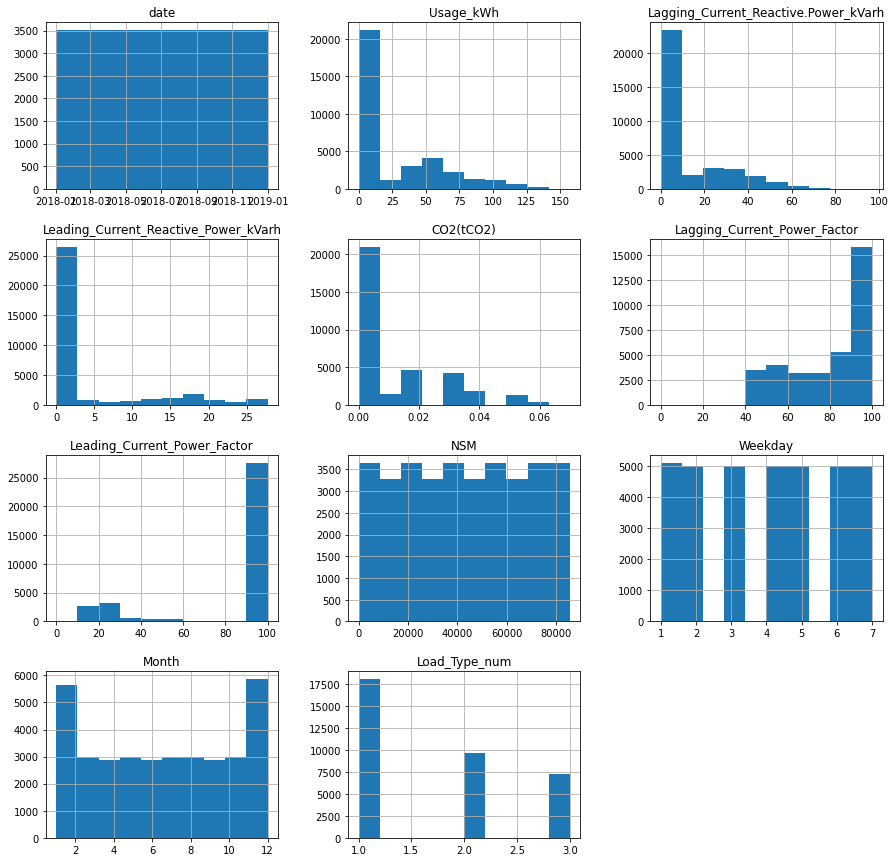

In [17]:
df.hist(figsize = (15,15))

[Text(0, 0, 'Usage_kWh'),
 Text(0, 0, 'Lagging_Current_Reactive.Power_kVarh'),
 Text(0, 0, 'Leading_Current_Reactive_Power_kVarh'),
 Text(0, 0, 'CO2(tCO2)'),
 Text(0, 0, 'Lagging_Current_Power_Factor'),
 Text(0, 0, 'Leading_Current_Power_Factor')]

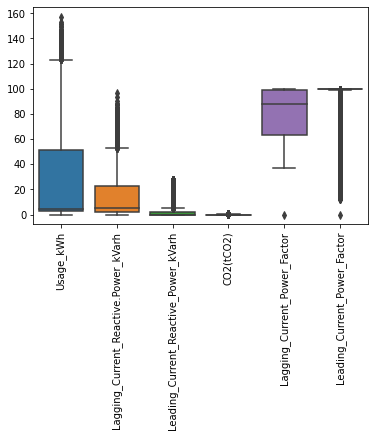

In [18]:
ax = sns.boxplot(data=df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh','CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']]) 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #https://stackoverflow.com/questions/44954123/rotate-xtick-labels-in-seaborn-boxplot

In [19]:
import hvplot.pandas
hvplot.extension('bokeh')
hvexplorer = hvplot.explorer(df, 
                             width=1000, height=600,
                             x='date', y_multi=['Usage_kWh'],
                             )
hvexplorer

hvDataFrameExplorer(axes=Axes(explorer=..., height=600, legend='right', logx=False, logy=False, name='Axes01568', responsive=False, shared_axes=True, width=1000, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping01598', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels01619', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer01553', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations01639', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style01659'), x='date', y='date', y_multi=['Usage_kWh'], z=None)

In [20]:
fig = px.scatter(df.query("Month>10"), x="NSM", y="Usage_kWh",
	          size='Weekday',color="Load_Type_num",
                 hover_name="Load_Type", log_x=False, size_max=20)
fig.show()

#To analyze... Wednesday... Groupby WeekDay

In [21]:
fig = px.scatter(df.query("Month>0 & Month<2"), x="NSM", y="Usage_kWh",
	          size='Weekday',color="Load_Type_num",
                 hover_name="Load_Type", log_x=False, size_max=20)
fig.show()

In [22]:
fig = px.scatter(df.query("Month>0 & Month<3"), x="NSM", y="Usage_kWh",
	          size='Weekday',color="Load_Type_num",
                 hover_name="Load_Type", log_x=False, size_max=20)
fig.show()

In [23]:
fig = px.scatter(df.query("Month>2 & Month<11"), x="NSM", y="Usage_kWh",
	          size='Weekday',color="Load_Type_num",
                 hover_name="Load_Type", log_x=False, size_max=20)
fig.show()

In [24]:
fig = px.scatter_3d(df, x='NSM', y='Usage_kWh', z='Month',
              color='Load_Type_num', size='Load_Type_num',size_max=15)
fig.show()

In [25]:
df.corr()

Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive.Power_kVarh   0.896150   
Leading_Current_Reactive_Power_kVarh  -0.324922   
CO2(tCO2)                              0.988180   
Lagging_Current_Power_Factor           0.385960   
Leading_Current_Power_Factor           0.353566   
NSM                                    0.234610   
Weekday                               -0.240705   
Month                                 -0.113961   
Load_Type_num                          0.614570   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.896150   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.405142   
CO2(tCO2)                                                         0.886948   
Lagging_Current_Power_Factor                                      0.144534   
Leading_Current_Power_Factor                                      0.407716   
NSM                                                               0.082662   
Weekday                                                          -0.256227   
Month                                                            -0.042136   
Load_Type_num                                                     0.451899   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh                                                        -0.324922   
Lagging_Current_Reactive.Power_kVarh                             -0.405142   
Leading_Current_Reactive_Power_kVarh                              1.000000   
CO2(tCO2)                                                        -0.332777   
Lagging_Current_Power_Factor                                      0.526770   
Leading_Current_Power_Factor                                     -0.944039   
NSM                                                               0.371605   
Weekday                                                           0.212922   
Month                                                            -0.027100   
Load_Type_num                                                     0.001776   

                                      CO2(tCO2)  Lagging_Current_Power_Factor  \
Usage_kWh                              0.988180                      0.385960   
Lagging_Current_Reactive.Power_kVarh   0.886948                      0.144534   
Leading_Current_Reactive_Power_kVarh  -0.332777                      0.526770   
CO2(tCO2)                              1.000000                      0.379605   
Lagging_Current_Power_Factor           0.379605                      1.000000   
Leading_Current_Power_Factor           0.360019                     -0.519967   
NSM                                    0.231726                      0.565270   
Weekday                               -0.235298                      0.042465   
Month                                 -0.108311                     -0.087052   
Load_Type_num                          0.610653                      0.519189   

                                      Leading_Current_Power_Factor  \
Usage_kWh                                                 0.353566   
Lagging_Current_Reactive.Power_kVarh                      0.407716   
Leading_Current_Reactive_Power_kVarh                     -0.944039   
CO2(tCO2)                                                 0.360019   
Lagging_Current_Power_Factor                             -0.519967   
Leading_Current_Power_Factor                              1.000000   
NSM                                                      -0.360563   
Weekday                                                  -0.257677   
Month                                                    -0.032322   
Load_Type_num                                             0.075394   

                                               NSM       Weekday  \
Usage_kWh                  

Text(0.5, 1.0, 'Correlation Graphic')

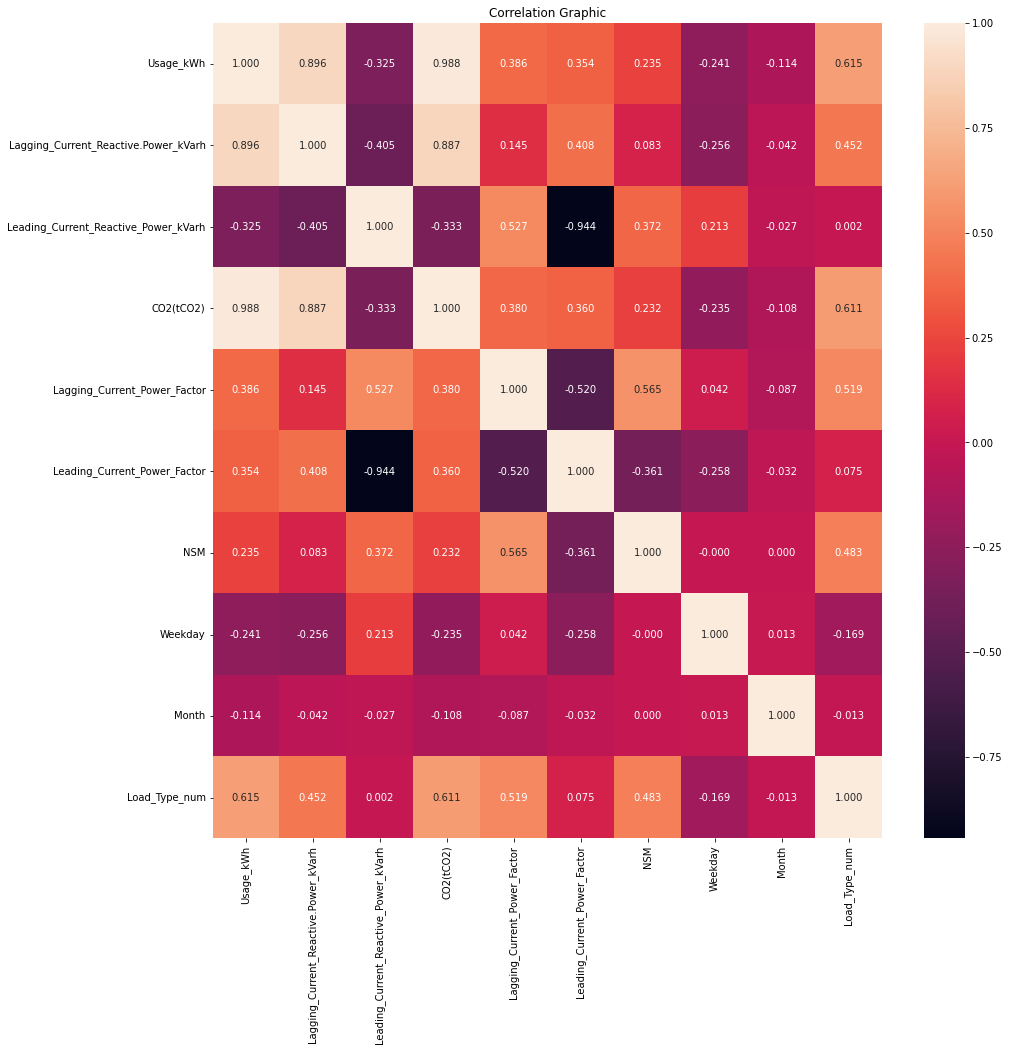

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.title("Correlation Graphic")

In [27]:
# TO AVOID LONG TIME AWAITING....
#sns.pairplot(df)

Similar to Excel Pivot Table will agregate some data as this dataset seems to have some variance due to days of week and Max/Min Load

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)[source]



In [28]:
print(pd.pivot_table(df,values=['Usage_kWh'],index=['Load_Type','Day_of_week'],aggfunc='mean'))
print(pd.pivot_table(df,values=['Usage_kWh'],index=['Load_Type','Day_of_week'],aggfunc='std'))

                          Usage_kWh
Load_Type    Day_of_week           
Light_Load   Friday       11.361442
             Monday        8.805459
             Saturday      7.072210
             Sunday        4.171106
             Thursday     11.803964
             Tuesday      10.510040
             Wednesday    10.780560
Maximum_Load Friday       61.043700
             Monday       66.278233
             Saturday     41.529605
             Sunday       29.195662
             Thursday     64.522758
             Tuesday      66.023359
             Wednesday    62.358359
Medium_Load  Friday       42.220494
             Monday       43.097231
             Saturday     17.547648
             Sunday       16.368934
             Thursday     44.986200
             Tuesday      45.020797
             Wednesday    40.462379
                          Usage_kWh
Load_Type    Day_of_week           
Light_Load   Friday       21.625091
             Monday       18.503945
             Saturday     14

In [29]:
print(pd.pivot_table(df,values=['Usage_kWh'],index=['Load_Type','WeekStatus'],aggfunc='mean'))
print(pd.pivot_table(df,values=['Usage_kWh'],index=['Load_Type','WeekStatus'],aggfunc='std'))

                         Usage_kWh
Load_Type    WeekStatus           
Light_Load   Weekday     10.636348
             Weekend      5.374577
Maximum_Load Weekday     64.044108
             Weekend     37.717295
Medium_Load  Weekday     43.160774
             Weekend     17.183318
                         Usage_kWh
Load_Type    WeekStatus           
Light_Load   Weekday     20.983010
             Weekend     10.488334
Maximum_Load Weekday     28.126184
             Weekend     27.238391
Medium_Load  Weekday     35.574968
             Weekend     23.983456


In [30]:
df_temp = pd.get_dummies(df, drop_first = True) #drop one categorical column
df_temp.head(2)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0 2018-01-01 00:15:00       3.17                                  2.95   
1 2018-01-01 00:30:00       4.00                                  4.46   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  Weekday  \
0                         73.21                         100.0   900        1   
1                         66.77                         100.0  1800        1   

   Month  Load_Type_num  WeekStatus_Weekend  Day_of_week_Monday  \
0      1              1                   0                   1   
1      1              1                   0                   1   

   Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   

   Day_of_week_Tuesday  Day_of_week_Wednesday  Load_Type_Maximum_Load  \
0                    0                      0                       0   
1                    0                      0                       0   

   Load_Type_Medium_Load  
0                      0  
1                      0

In [31]:
df_temp.head(5)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0 2018-01-01 00:15:00       3.17                                  2.95   
1 2018-01-01 00:30:00       4.00                                  4.46   
2 2018-01-01 00:45:00       3.24                                  3.28   
3 2018-01-01 01:00:00       3.31                                  3.56   
4 2018-01-01 01:15:00       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  Weekday  \
0                         73.21                         100.0   900        1   
1                         66.77                         100.0  1800        1   
2                         70.28                         100.0  2700        1   
3                         68.09                         100.0  3600        1   
4                         64.72                         100.0  4500        1   

   Month  Load_Type_num  WeekStatus_Weekend  Day_of_week_Monday  \
0      1              1                   0                   1   
1      1              1                   0                   1   
2      1              1                   0                   1   
3      1              1                   0                   1   
4      1              1                   0                   1   

   Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Day_of_week_Tuesday  Day_of_week_Wednesday  Load_Type_Maximum_Load  \
0                    0                      0                       0   
1                    0                      0                       0   
2                    0                      0                       0   
3                    0                      0                       0   
4                    0                      0                       0   

   Load_Type_Medium_Load  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

Text(0.5, 1.0, 'Correlation Graphic')

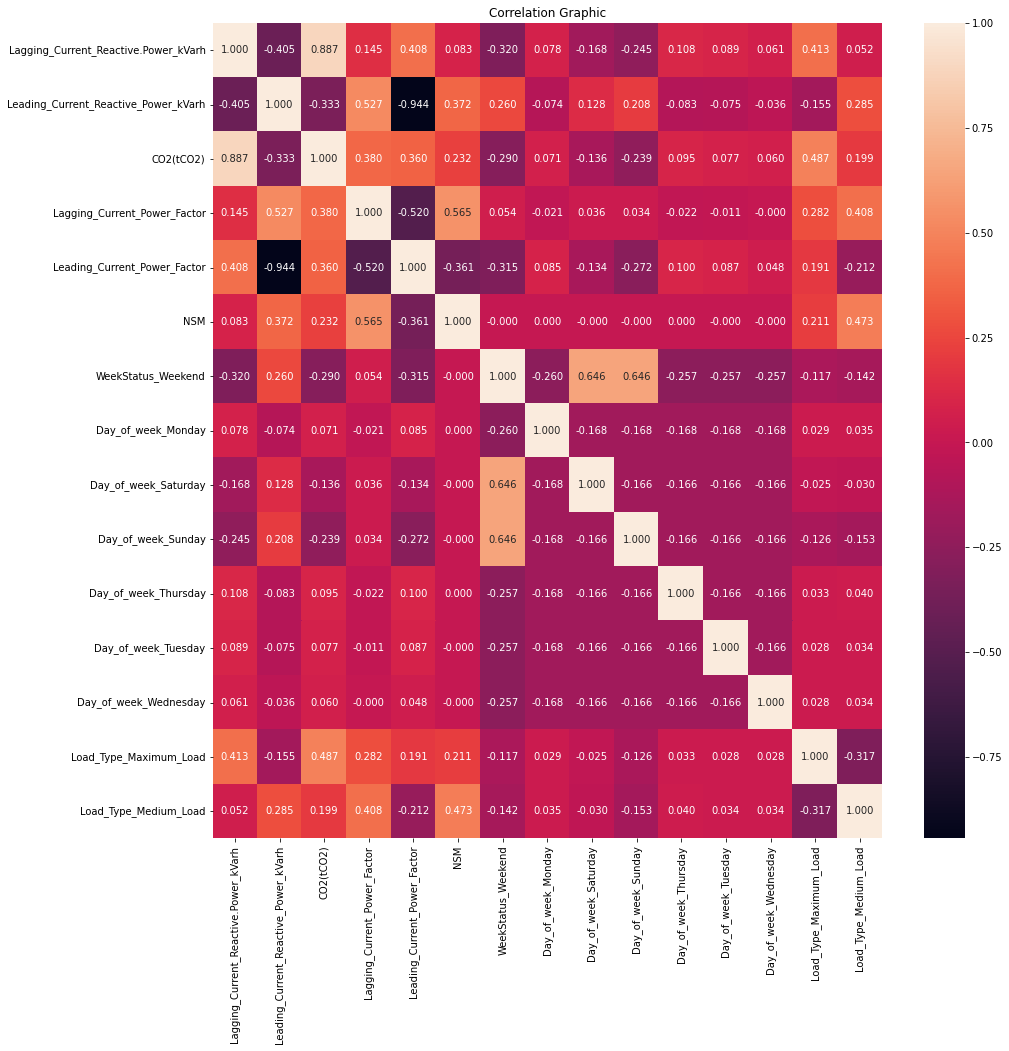

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap( df_temp.iloc[:, [2,3,4,5,6,7,11,12,13,14,15,16,17,18,19]].corr(), annot=True, fmt='.3f')
plt.title("Correlation Graphic")

In [33]:
df_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   Weekday                               35040 non-null  int64         
 9   Month                                 35040 non-null  int64         
 10

Prepare columns to extract only what I need. (and VInd from VDep)

In [34]:
#Dataset reduced (column 3 is not included) due to highly correlation between Leading_Current_Reactive_Power_kVarh and Leading_Current_Power_Factor)
y, X = df_temp.iloc[:, 1] , df_temp.iloc[:, [2,4,5,6,7,11,12,13,14,15,16,17,18,19]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3) #, random_state=0)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23360, 14)
(23360,)
(11680, 14)
(11680,)


In [36]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

Let's practice with:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [37]:
#print(regr.feature_names_in_,'\n ')
#print('Coeficients',regr.coef_," \n\n Intercept: ",regr.intercept_)

print('Intercept: ',regr.intercept_,'\n\n')
list(zip(regr.feature_names_in_, regr.coef_)) #bind the data

Intercept:  -10.101155480684444 




[('Lagging_Current_Reactive.Power_kVarh', 0.3260404581227118),
 ('CO2(tCO2)', 1644.5374665184856),
 ('Lagging_Current_Power_Factor', 0.12066867070666598),
 ('Leading_Current_Power_Factor', 0.04395841301508874),
 ('NSM', -4.516766239248682e-06),
 ('WeekStatus_Weekend', 0.14423276120028494),
 ('Day_of_week_Monday', 0.05420879088474562),
 ('Day_of_week_Saturday', -0.04981195904003935),
 ('Day_of_week_Sunday', 0.1940447202783525),
 ('Day_of_week_Thursday', -0.041899091507219835),
 ('Day_of_week_Tuesday', 0.8124809966195127),
 ('Day_of_week_Wednesday', 0.07872775594110012),
 ('Load_Type_Maximum_Load', 1.5657340143638983),
 ('Load_Type_Medium_Load', 2.0186734182174346)]

In [38]:
# By using .predct() method we will build predictions using the testing set (X_test)

y_pred_test = regr.predict(X_test)  #Predict using the linear model. This y_pred_test will be compared with y_test (real)

print(y_pred_test)
print(" ---- ")
print(y_test)

[68.12991336  2.38263616 67.26282698 ...  2.49957731 47.86570426
 44.7131618 ]
 ---- 
10997     72.00
13351      3.06
27035     70.74
2756     117.43
1627      34.88
          ...  
1161       4.72
26756     34.92
20406      2.74
21255     52.09
9835      51.48
Name: Usage_kWh, Length: 11680, dtype: float64


 MAS INFO EN: 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Result:

Mean squared error: 21.798055995345123

Variance score:  0.9802876807455071

Max Error:  119.63182891259733

Mean Absolute Error :  2.5878755150985

Score (total) :  0.9804382152216924

In [39]:
# The mean squared error
print("Mean squared error:", metrics.mean_squared_error(y_test, y_pred_test))
# Explained variance score: 1 is perfect prediction. We have got (0.98155)
print('Variance score: ', metrics.r2_score(y_test, y_pred_test))
#Other metrics (as we import all libraries)
print('Max Error: ', metrics.max_error(y_test, y_pred_test))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred_test))

#print(X.shape)
#print(y.shape)
print('Score (total) : ', regr.score(X,y))

Mean squared error: 19.566643957255067
Variance score:  0.9822763575406099
Max Error:  116.03656295162679
Mean Absolute Error :  2.6073416768248867
Score (total) :  0.9804006180145


Similar to matlab (polyfit)... X, Y and order... to get the line model 

m= coefficient (s). In our case is a line so k=1 (1 dimension)
n= resodiañ


https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [40]:
y_test

10997     72.00
13351      3.06
27035     70.74
2756     117.43
1627      34.88
          ...  
1161       4.72
26756     34.92
20406      2.74
21255     52.09
9835      51.48
Name: Usage_kWh, Length: 11680, dtype: float64

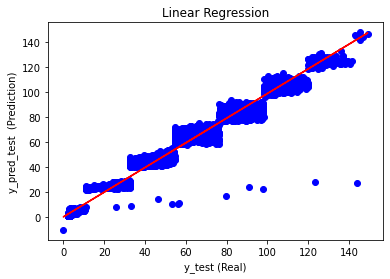

In [41]:
#visualize model
x_graf = y_test
y_graf = y_pred_test

plt.plot(x_graf, y_graf, 'o', color = 'blue')
plt.title('Linear Regression')
plt.xlabel('y_test (Real)')
plt.ylabel('y_pred_test  (Prediction)')

m, n = np.polyfit(x_graf, y_graf, 1)
plt.plot(x_graf, m * x_graf + n, color='red')
plt.show()

# ⏰ Adding new Regression methods to compare 

See also
Ridge : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.

Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

The Lasso is a linear model that estimates sparse coefficients with l1 regularization.

ElasticNet: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.

More to read... (added to my ToDo reading  in IA folder)

https://hastie.su.domains/ISLR2/ISLRv2_website.pdf

In [ ]:
bypass=True;

if bypass==False:
    print('Reduced Dataset is used')
    y, X = df_temp.iloc[:, 1] , df_temp.iloc[:, [2,5,6,7]]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3) #, random_state=0)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
else:
    print('Bypassed Actived. Old Dataset used')

Bypassed Actived. Old Dataset used


In [42]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
#print(ridge.coef_)
#print(ridge.intercept_)
ridge.score(X_test, y_test)

0.9672159138950159

In [43]:
print('Intercept: ',ridge.intercept_,'\n\n')
list(zip(ridge.feature_names_in_, ridge.coef_))

Intercept:  -37.1117678582324 




[('Lagging_Current_Reactive.Power_kVarh', 0.8393130702556731),
 ('CO2(tCO2)', 895.4744510824875),
 ('Lagging_Current_Power_Factor', 0.34476131558625533),
 ('Leading_Current_Power_Factor', 0.1541457322739823),
 ('NSM', -6.38812033713213e-07),
 ('WeekStatus_Weekend', 0.5067954792806793),
 ('Day_of_week_Monday', 0.09202223479806888),
 ('Day_of_week_Saturday', -0.03409113607921772),
 ('Day_of_week_Sunday', 0.5408866153369484),
 ('Day_of_week_Thursday', -0.11777464887476906),
 ('Day_of_week_Tuesday', 0.5465059236273005),
 ('Day_of_week_Wednesday', 0.13919962127258095),
 ('Load_Type_Maximum_Load', 4.017365160094735),
 ('Load_Type_Medium_Load', 4.875384701648603)]

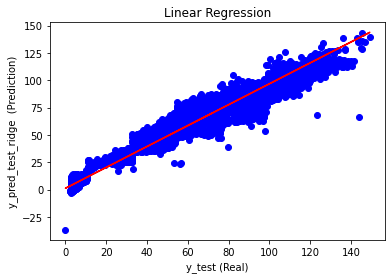

In [45]:
y_pred_test_ridge = ridge.predict(X_test)

#visualize model
x_graf = y_test
y_graf = y_pred_test_ridge

plt.plot(x_graf, y_graf, 'o', color = 'blue')
plt.title('Linear Regression')
plt.xlabel('y_test (Real)')
plt.ylabel('y_pred_test_ridge  (Prediction)')

m, n = np.polyfit(x_graf, y_graf, 1)
plt.plot(x_graf, m * x_graf + n, color='red')
plt.show()

In [46]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
#print(lasso.coef_)
#print(lasso.intercept_)
lasso.score(X_test, y_test)

0.9102870345517161

In [47]:
print('Intercept: ',lasso.intercept_,'\n\n')
list(zip(lasso.feature_names_in_, lasso.coef_))

Intercept:  -78.24889292946425 




[('Lagging_Current_Reactive.Power_kVarh', 1.4737536078253608),
 ('CO2(tCO2)', 0.0),
 ('Lagging_Current_Power_Factor', 0.7068558504460292),
 ('Leading_Current_Power_Factor', 0.31439260188115714),
 ('NSM', 6.869866011493134e-05),
 ('WeekStatus_Weekend', 0.0),
 ('Day_of_week_Monday', 0.0),
 ('Day_of_week_Saturday', 0.0),
 ('Day_of_week_Sunday', -0.0),
 ('Day_of_week_Thursday', -0.0),
 ('Day_of_week_Tuesday', 0.0),
 ('Day_of_week_Wednesday', 0.0),
 ('Load_Type_Maximum_Load', 0.0),
 ('Load_Type_Medium_Load', 0.0)]

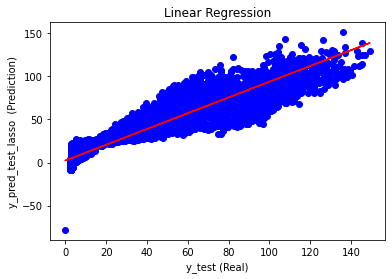

In [48]:
y_pred_test_lasso = lasso.predict(X_test)

#visualize model
x_graf = y_test
y_graf = y_pred_test_lasso

plt.plot(x_graf, y_graf, 'o', color = 'blue')
plt.title('Linear Regression')
plt.xlabel('y_test (Real)')
plt.ylabel('y_pred_test_lasso  (Prediction)')

m, n = np.polyfit(x_graf, y_graf, 1)
plt.plot(x_graf, m * x_graf + n, color='red')
plt.show()

In [49]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
#print(elastic.coef_)
#print(elastic.intercept_)
elastic.score(X_test, y_test)


0.9104882620690614

In [50]:
print('Intercept: ',elastic.intercept_,'\n\n')
list(zip(elastic.feature_names_in_, elastic.coef_))

Intercept:  -78.42281251169855 




[('Lagging_Current_Reactive.Power_kVarh', 1.4714430820047246),
 ('CO2(tCO2)', 0.0),
 ('Lagging_Current_Power_Factor', 0.7079439620817588),
 ('Leading_Current_Power_Factor', 0.3158155373704253),
 ('NSM', 6.738303825711585e-05),
 ('WeekStatus_Weekend', 0.0),
 ('Day_of_week_Monday', 0.0),
 ('Day_of_week_Saturday', 0.0),
 ('Day_of_week_Sunday', -0.0),
 ('Day_of_week_Thursday', -0.0),
 ('Day_of_week_Tuesday', 0.0),
 ('Day_of_week_Wednesday', 0.0),
 ('Load_Type_Maximum_Load', 0.0),
 ('Load_Type_Medium_Load', 0.18960059870134777)]

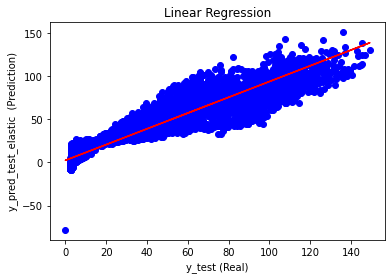

In [51]:
y_pred_test_elastic = elastic.predict(X_test)

#visualize model
x_graf = y_test
y_graf = y_pred_test_elastic

plt.plot(x_graf, y_graf, 'o', color = 'blue')
plt.title('Linear Regression')
plt.xlabel('y_test (Real)')
plt.ylabel('y_pred_test_elastic  (Prediction)')

m, n = np.polyfit(x_graf, y_graf, 1)
plt.plot(x_graf, m * x_graf + n, color='red')
plt.show()

Only to comment about these two last methods is the large number of factors with coefficient = 0 ....

# ⏰ CONTINUAMOS CON SVR (PENDIENTE FINALIZAR)

In [52]:
y, X = df_temp.iloc[:, 1] , df_temp.iloc[:, [2,4,5,6,7,11,12,13,14,15,16,17,18,19]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3) #, random_state=0)

In [53]:
print('TRAINING DATA SET')
print(X_train.shape)
print(y_train.shape)
print('\nTEST DATA SET')
print(X_test.shape)
print(y_test.shape)

TRAINING DATA SET
(23360, 14)
(23360,)

TEST DATA SET
(11680, 14)
(11680,)


In [54]:
y_svr=df_temp.iloc[:, 1:2]
X_svr=X

In [55]:
stdscl_X = StandardScaler()         
stdscl_y = StandardScaler()  

In [56]:
X_svr = stdscl_X.fit_transform(X_svr)  
y_svr = stdscl_y.fit_transform(y_svr) 

In [57]:
print(X_svr.shape)
print(y_svr.shape)

(35040, 14)
(35040, 1)


In [58]:
# Create SVR object
from sklearn.svm import SVR                        
SVRregression = SVR(kernel = "rbf")     
SVRregression.fit(X_svr, y_svr.ravel()) 

SVR()

In [59]:
SVRregression.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but SVR was fitted without feature names



-0.5968530417491429

# ⏰ CONTINUAMOS CON XGBoost

https://xgboost.readthedocs.io/en/stable/parameter.html

In [ ]:
import xgboost as xgb

In [146]:
#tree_method='exact','approx' (default= 'auto')
#objective="reg:squarederror"
xgb_model=xgb.XGBRegressor(objective="reg:squarederror", eta=0.3, gamma=1, max_depth=15, tree_method='approx' , random_state=1)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test,y_test)

0.9969468049088477

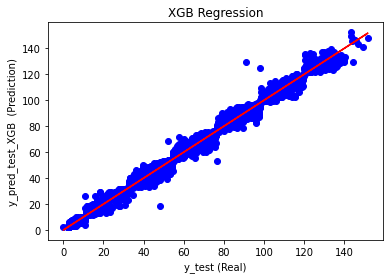

In [144]:
y_pred_test_XGB=xgb_model.predict(X_test)

#visualize model
x_graf = y_test
y_graf = y_pred_test_XGB

plt.plot(x_graf, y_graf, 'o', color = 'blue')
plt.title('XGB Regression')
plt.xlabel('y_test (Real)')
plt.ylabel('y_pred_test_XGB  (Prediction)')

m, n = np.polyfit(x_graf, y_graf, 1)
plt.plot(x_graf, m * x_graf + n, color='red')
plt.show()

In [124]:
mse=metrics.mean_squared_error(y_test,y_pred_test_XGB)
print(np.sqrt(mse))

1.033015940545536
